# MH of older workers, retirement age and working conditions

# Final datasets

Load libraries

In [11]:
import os
import sys

src_path = os.path.abspath("../")
sys.path.append(src_path)

from utils.common import *
from utils.ewcs import *
from utils.retirement import *
from utils.share import *

import_libraries()

Merge final SHARE and EWCS data to create different datasets

In [12]:
# 3 digits waves 4,5,6 merge on year and country
merge_share_ewcs("3digits_w456_year_country.csv", convert_to_3_digits=True)
# 3 digits waves 4,5,6 common merge on year and country
merge_share_ewcs(
    "3digits_w456_year_country_balanced.csv", convert_to_3_digits=True, balanced=True
)
# 3 digits waves 4,6 merge on year and country
merge_share_ewcs(
    "3digits_w46_year_country.csv", convert_to_3_digits=True, exclude_wave_5=True
)
# 3 digits waves 4,6 common merge on year and country
merge_share_ewcs(
    "3digits_w46_year_country_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    exclude_wave_5=True,
)

# 3 digits waves 4,5,6 merge on year
merge_share_ewcs(
    "3digits_w456_year.csv", convert_to_3_digits=True, not_country_wise=True
)
# 3 digits waves 4,5,6 common merge on year
merge_share_ewcs(
    "3digits_w456_year_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    not_country_wise=True,
)
# 3 digits waves 4,6 merge on year
merge_share_ewcs(
    "3digits_w46_year.csv",
    convert_to_3_digits=True,
    exclude_wave_5=True,
    not_country_wise=True,
)
# 3 digits waves 4,6 common merge on year
merge_share_ewcs(
    "3digits_w46_year_balanced.csv",
    convert_to_3_digits=True,
    balanced=True,
    exclude_wave_5=True,
    not_country_wise=True,
)

# 4 digits waves 4,5,6 merge on year and country
merge_share_ewcs("4digits_w456_year_country.csv")
# 4 digits waves 4,5,6 common merge on year and country
merge_share_ewcs("4digits_w456_year_country_balanced.csv", balanced=True)
# 4 digits waves 4,6 merge on year and country
merge_share_ewcs("4digits_w46_year_country.csv", exclude_wave_5=True)
# 4 digits waves 4,6 common merge on year and country
merge_share_ewcs(
    "4digits_w46_year_country_balanced.csv", balanced=True, exclude_wave_5=True
)

# 4 digits waves 4,5,6 merge on year
merge_share_ewcs("4digits_w456_year.csv", not_country_wise=True)
# 4 digits waves 4,5,6 common merge on year
merge_share_ewcs("4digits_w456_year_balanced.csv", balanced=True, not_country_wise=True)
# 4 digits waves 4,6 merge on year
merge_share_ewcs("4digits_w46_year.csv", exclude_wave_5=True, not_country_wise=True)
# 4 digits waves 4,6 common merge on year
merge_share_ewcs(
    "4digits_w46_year_balanced.csv",
    balanced=True,
    exclude_wave_5=True,
    not_country_wise=True,
)

In [13]:
folder_path = (
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/"
)
files = os.listdir(folder_path)

for file in files:
    if file.startswith("3digits") or file.startswith("4digits"):
        file_path = os.path.join(folder_path, file)
        data = pd.read_csv(file_path)  # Read the CSV file
        unique_values = data[
            "mergeid"
        ].nunique()  # Count unique values in the 'mergeid' column
        print(f"{file[:-4]} : {unique_values} unique ids")

3digits_w456_year_country_balanced : 1393 unique ids
4digits_w456_year_country_balanced : 959 unique ids
4digits_w46_year_country : 2470 unique ids
4digits_w456_year_country : 2505 unique ids
3digits_w46_year_country : 2966 unique ids
3digits_w456_year_balanced : 2049 unique ids
4digits_w46_year_country_balanced : 998 unique ids
4digits_w46_year_balanced : 2071 unique ids
4digits_w46_year : 3369 unique ids
4digits_w456_year : 3437 unique ids
3digits_w46_year_country_balanced : 1457 unique ids
3digits_w456_year_country : 3023 unique ids
3digits_w456_year : 3493 unique ids
3digits_w46_year_balanced : 2157 unique ids
4digits_w456_year_balanced : 1861 unique ids
3digits_w46_year : 3414 unique ids


In [14]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/4digits_w46_year_balanced.csv"
)

In [15]:
df.country.unique()

array(['Austria', 'Belgium', 'Czech Republic', 'Switzerland', 'Denmark',
       'Estonia', 'Spain', 'France', 'Italy', 'Slovenia'], dtype=object)

In [21]:
df[df.year == 2015].work_horizon_change_total.describe()

count    2071.000000
mean        1.142255
std         1.289026
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         5.250000
Name: work_horizon_change_total, dtype: float64

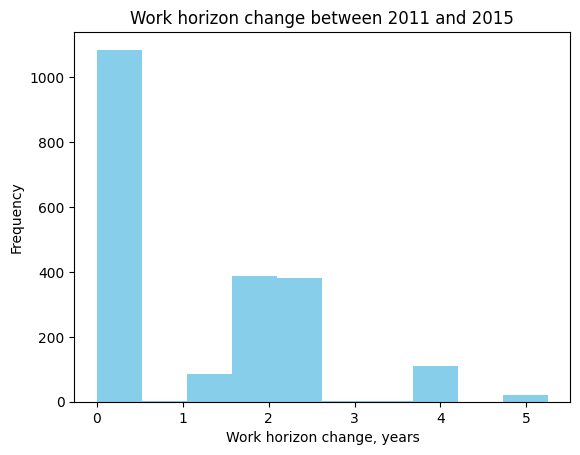

In [22]:
plt.hist(df[df.year == 2015].work_horizon_change_total, bins=10, color="skyblue")
plt.xlabel("Work horizon change, years")
plt.ylabel("Frequency")
plt.title("Work horizon change between 2011 and 2015")
plt.show()

Number of unique IDs: 2071
Number of unique IDs by country:
country
Austria           148
Belgium           320
Czech Republic    165
Denmark           168
Estonia           394
France            208
Italy             127
Slovenia          101
Spain             123
Switzerland       317
Name: mergeid, dtype: int64
Number of unique IDs by year:
year
2011    2071
2015    2071
Name: mergeid, dtype: int64

Demographics:
           age   gender  nb_children  yrseducation
count  4142.00  4142.00      4142.00       4142.00
mean     55.81     0.57         1.85         12.47
std       3.08     0.50         1.31          4.61
min      50.00     0.00         0.00          0.00
25%      54.00     0.00         1.00         10.00
50%      56.00     1.00         2.00         13.00
75%      58.00     1.00         3.00         16.00
max      65.00     1.00        10.00         36.00


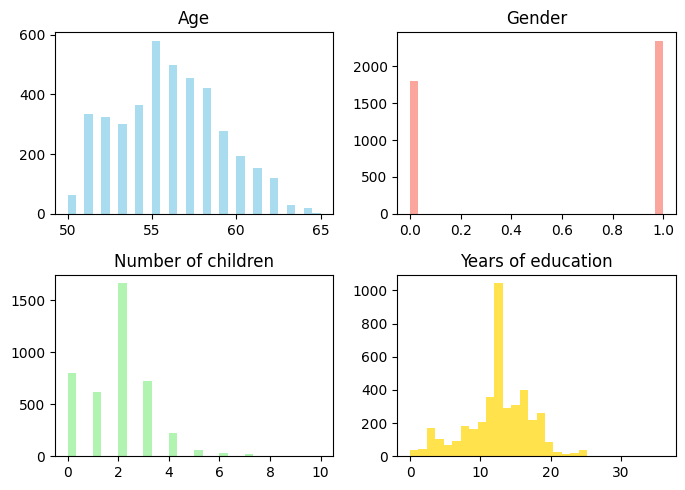


Job Status:
job_status
Employee                   0.36
Private sector employee    0.26
Public sector employee     0.18
Self-employed              0.12
Civil servant              0.08
Name: proportion, dtype: float64

Industry of Employment:
industry
Health and social work                          0.15
Other community                                 0.13
Education                                       0.13
Manufacturing                                   0.11
Wholesale and retail trade                      0.11
Public administration and defence               0.10
Construction                                    0.06
Transport, storage and communication            0.06
Agriculture, hunting, forestry, fishing         0.04
Financial intermediation                        0.04
Hotels and restaurants                          0.03
Real estate, renting and business activities    0.02
Electricity, gas and water supply               0.02
Mining and quarrying                            0.01
Name: p

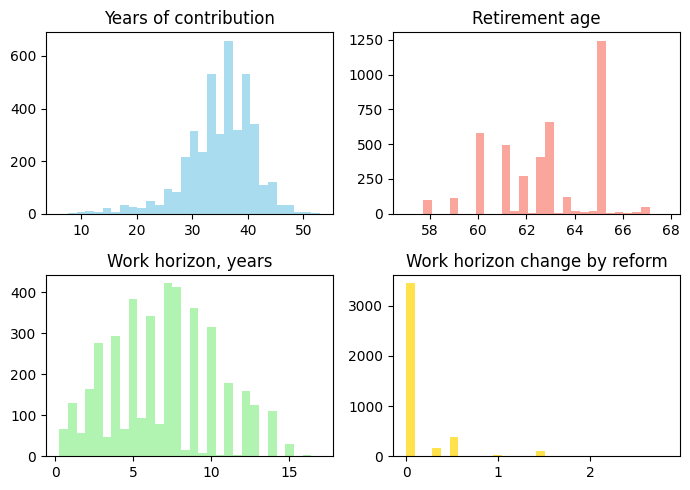


Physical Health and Chronic Diseases:
sphus2  chronic2
0       0           0.39
1       0           0.35
0       1           0.21
1       1           0.06
Name: proportion, dtype: float64

Mental Health:
eurodcat
0    0.81
1    0.19
Name: proportion, dtype: float64
EuroD scale score:
eurod
0.0     1057
1.0      961
2.0      801
3.0      532
4.0      371
5.0      214
6.0      106
7.0       60
8.0       19
9.0       13
10.0       6
12.0       2
Name: count, dtype: int64


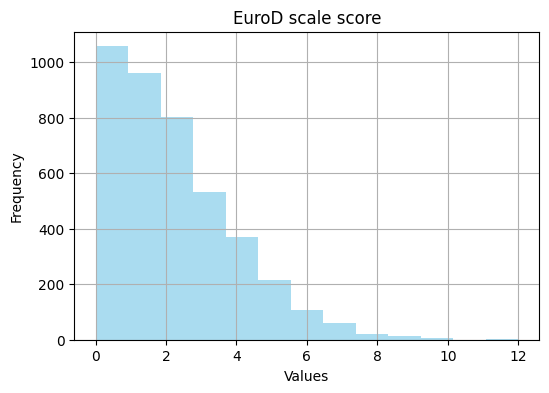


Working Conditions:
       jqi_monthly_earnings_pure  jqi_skills_discretion_pure  \
count                    4142.00                     4142.00   
mean                     1584.94                       59.82   
std                       507.52                       13.98   
min                       307.61                        5.41   
25%                      1250.78                       49.16   
50%                      1514.97                       59.92   
75%                      1855.20                       71.47   
max                      4320.87                       91.23   

       jqi_social_environment_pure  jqi_physical_environment_pure  \
count                      4142.00                        4142.00   
mean                         80.64                          84.64   
std                           4.90                           8.58   
min                          40.91                          28.21   
25%                          78.32                       

In [19]:
describe_data(df)

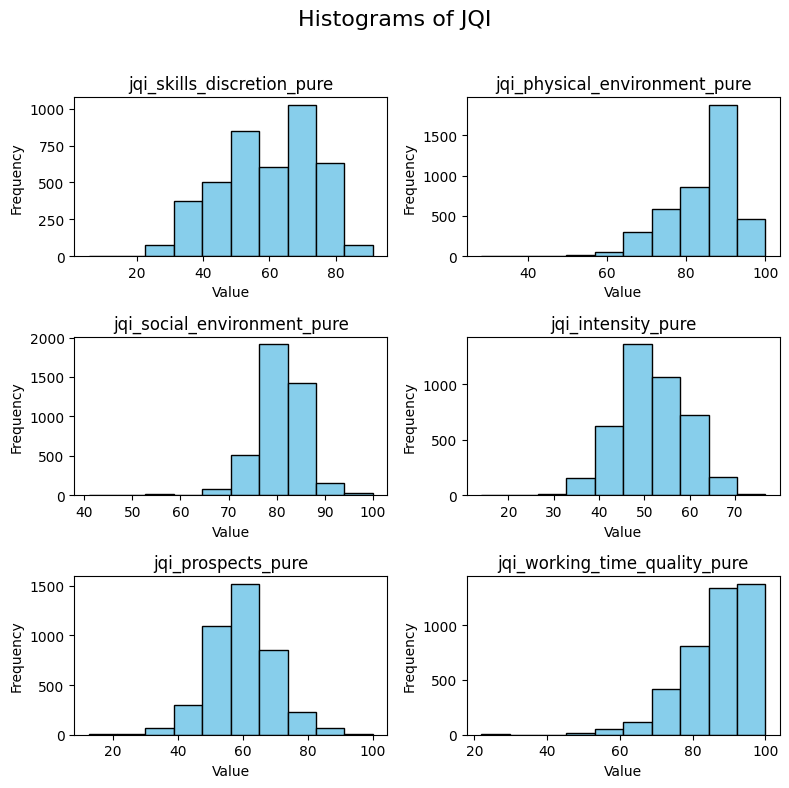

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
fig.suptitle("Histograms of JQI", fontsize=16)

axes = axes.flatten()

for i, column in enumerate(
    df[
        [
            "jqi_skills_discretion_pure",
            "jqi_physical_environment_pure",
            "jqi_social_environment_pure",
            "jqi_intensity_pure",
            "jqi_prospects_pure",
            "jqi_working_time_quality_pure",
        ]
    ].columns
):
    axes[i].hist(df[column], bins=10, color="skyblue", edgecolor="black")
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()